# Video: Optimizing Models by Random Walks

In this video, you will see a generic method for optimizing models using random walks through the parameter space.

Script:
* In this video, I will show you a simple method for optimizing the parameters of a model using random walks.
* I am showing you this technique mainly for your intuition, since it is usually not the best method available.
* However, it is broadly applicable and does make occasional appearances in state of the art work when other methods would be impractical.


## Sample Data for Regression


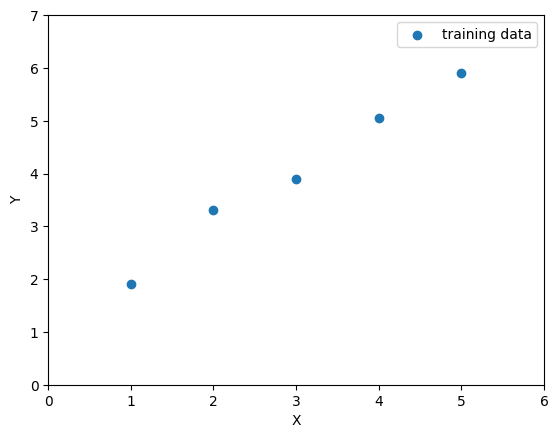

In [ ]:
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5])
Y = np.array([1.9, 3.3, 3.9, 5.05, 5.9])

plt.scatter(X, Y, label="training data")
plt.xlabel("X")
plt.xlim(0, 6)
plt.ylabel("Y")
plt.ylim(0, 7)
plt.legend()
plt.show();

Script:
* As usual, I will use linear regression as an example.
* Using the $y = mx+b$ formula, we will be looking for the best values of $m$ and $b$ to match this data with the least $L_2$ loss predicting the $y$ values.
* I picked the data to be close to $y=x+1$, so we should expect both $m$ and $b$ around 1.

## $L_2$ loss in Linear Model Parameter Space


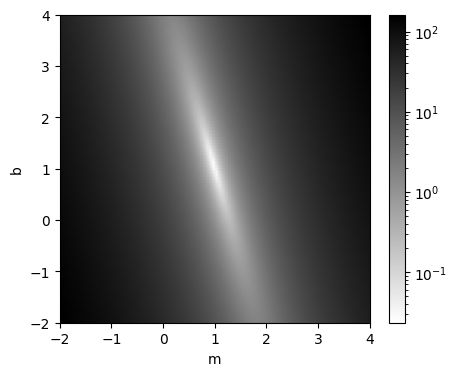

In [ ]:
import numpy as np

m_delta = 3
b_delta = 3
sample_m_values = np.linspace(1-m_delta, 1+m_delta, 100)
sample_b_values = np.linspace(1-b_delta, 1+b_delta, 100)

sample_ms, sample_bs = np.meshgrid(sample_m_values, sample_b_values)
sample_ms = sample_ms.reshape(-1, 1)
sample_bs = sample_bs.reshape(-1, 1)

def calculate_loss(m, b):
    return np.mean((Y - (m * X + b))**2)

l2_losses = [calculate_loss(m, b) for (m, b) in zip(sample_ms, sample_bs)]
l2_losses = np.array(l2_losses).reshape(len(sample_m_values), len(sample_b_values))

plt.figure(figsize=(5, 4))
plt.pcolormesh(sample_m_values,
            sample_b_values,
            l2_losses,
            cmap="binary",
            norm="log",
            shading='gouraud')
plt.colorbar()
plt.xlabel("m")
plt.ylabel("b")
plt.show();

Script:
* Here is a plot of the $L_2$ loss for this data set in parameter space.
* The horizontal axis is the $m$ parameter and the vertical axis is the $b$ parameter.
* I should mention that we generally will not use this kind of loss plot since it only works if the model only has two parameters.
* However, for this simple example, it will give us a bird's eye view of how the random walks behave, and how they optimize the model parameters.
* The bright spot in the middle is the optimal parameters which are roughly $m=1$ and $b=1$.
* So we'd like to see a process that moves the parameters towards those values.

## A Random Walk through Linear Model Parameter Space


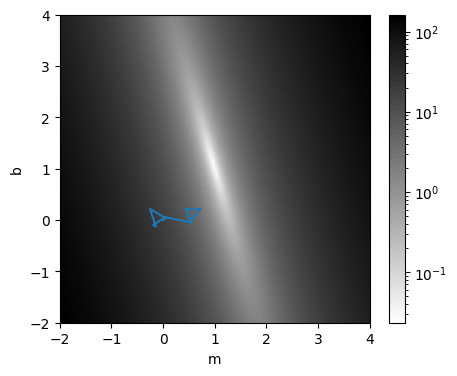

In [ ]:
plt.figure(figsize=(5, 4))
plt.pcolormesh(sample_m_values,
            sample_b_values,
            l2_losses,
            cmap="binary",
            norm="log",
            shading='gouraud')
plt.colorbar()

random_m = [0.0]
random_b = [0.0]
random_step_size = 0.25

for _ in range(10):
    random_m.append(random_m[-1] + np.random.normal(0, random_step_size))
    random_b.append(random_b[-1] + np.random.normal(0, random_step_size))

plt.plot(random_m, random_b)

plt.xlabel("m")
plt.ylabel("b")
plt.show();

Script:
* Here's an example of a random walk through parameter.
* At each step, a small random value was added to each of the parameters, and that next point in parameter space was plotted.
* Notice that it is sometimes moving towards the best parameters and sometimes it is moving away.
* That is because this random walk is oblivious to the loss function.

## Many Random Walks through Linear Model Parameter Space


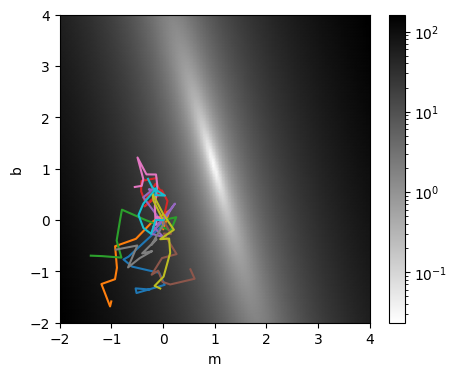

In [ ]:
plt.figure(figsize=(5, 4))
plt.pcolormesh(sample_m_values,
            sample_b_values,
            l2_losses,
            cmap="binary",
            norm="log",
            shading='gouraud')
plt.colorbar()

for _ in range(10):
    random_m = [0.0]
    random_b = [0.0]

    for _ in range(10):
        random_m.append(random_m[-1] + np.random.normal(0, random_step_size))
        random_b.append(random_b[-1] + np.random.normal(0, random_step_size))

    plt.plot(random_m, random_b)

plt.xlabel("m")
plt.ylabel("b")
plt.show();

Script:
* Here are a few more random walks all starting from the same zero start.
* Notice how they drift around and often move away from the optimal parameters?
* We should change these random walks to introduce a bias towards better parameters.


## Filtered Random Walks through Linear Model Parameter Space


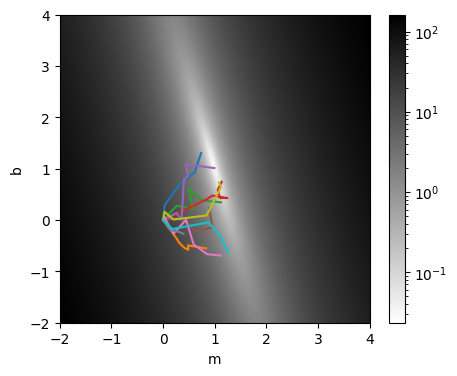

In [ ]:
plt.figure(figsize=(5, 4))
plt.pcolormesh(sample_m_values,
            sample_b_values,
            l2_losses,
            cmap="binary",
            norm="log",
            shading='gouraud')
plt.colorbar()

for _ in range(10):
    random_m = [0.0]
    random_b = [0.0]

    for _ in range(10):
        new_m = random_m[-1] + np.random.normal(0, random_step_size)
        new_b = random_b[-1] + np.random.normal(0, random_step_size)

        if calculate_loss(new_m, new_b) < calculate_loss(random_m[-1], random_b[-1]):
            random_m.append(new_m)
            random_b.append(new_b)

    plt.plot(random_m, random_b)

plt.xlabel("m")
plt.ylabel("b")
plt.show();

Script:
* A simple way to add that bias is to only take random steps if they improve the loss function.
* All these random walks moved to better loss parameters, even if they did not take the best direction.
* However, a downside is that now the random walk takes fewer steps, especially as the model parameters get closer to optimal.

## A Filtered Random Walk


In [ ]:
import pandas as pd

current_m = [0.0]
current_b = [0.0]

candidate_m = []
candidate_b = []

while len(current_m) < 11:
    candidate_m.append(current_m[-1] + np.random.normal(0, random_step_size))
    candidate_b.append(current_b[-1] + np.random.normal(0, random_step_size))
    if calculate_loss(candidate_m[-1], candidate_b[-1]) < calculate_loss(current_m[-1], current_b[-1]):
        current_m.append(candidate_m[-1])
        current_b.append(candidate_b[-1])
    else:
        current_m.append(current_m[-1])
        current_b.append(current_b[-1])

current_m.pop()
current_b.pop()

df = pd.DataFrame(columns=["current_m", "current_b", "current_loss", "candidate_m", "candidate_b", "candidate_loss"],
                  data = {"current_m": current_m, "current_b": current_b,
                          "current_loss": [calculate_loss(m, b) for (m, b) in zip(current_m, current_b)],
                          "candidate_m": candidate_m, "candidate_b": candidate_b,
                          "candidate_loss": [calculate_loss(m, b) for (m, b) in zip(candidate_m, candidate_b)]})

df


,current_m,current_b,current_loss,candidate_m,candidate_b,candidate_loss
0,0.000000,0.000000,18.004500,0.021212,-0.077172,18.031425
1,0.000000,0.000000,18.004500,-0.111931,-0.071519,21.898627
2,0.000000,0.000000,18.004500,0.116749,-0.213237,16.496392
3,0.116749,-0.213237,16.496392,-0.375658,-0.194136,32.092420
4,0.116749,-0.213237,16.496392,-0.229059,0.156786,23.537830
5,0.116749,-0.213237,16.496392,-0.252834,-0.024020,26.006561
6,0.116749,-0.213237,16.496392,0.191264,0.011520,12.980128
7,0.191264,0.011520,12.980128,0.511782,-0.282315,8.053166
8,0.511782,-0.282315,8.053166,0.169424,-0.320571,15.931014
9,0.511782,-0.282315,8.053166,0.459511,-0.463276,10.132044


Script:
* This table looks at the behavior of a specific random walk in more detail.
* We should expect at most half of the random steps to be taken with this simple model.
* This because any random step that improves the loss would hurt the loss if the direction was flipped.
* On the other hand, we do not know that either direction of a random step will improve the loss.
* One direction may increase the loss by going away from the optimal parameters, and the other may overshoot and increase the loss by going past the optimal parameters.
* A more sophisticated version of this random walk process would shrink the random steps over time to reduce overshooting.
* If you are curious, one such algorithm is called simulating annealing and has been used for decades with many complicated functions.


Script: (faculty on screen)
* Random walks are a simple and easy way to optimize model parameters.
* Random walks work for almost any kind of model where the model predictions are a smoothly changing function of the inputs and the model parameters.
* As your data science toolkit grows, random walks will not be the first option that you reach for, but the intuitions that you gain from this video will be foundational for other methods.
